## HW9

### 휴먼지능정보공학과 201910803 박채희

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data
from skimage.exposure import rescale_intensity

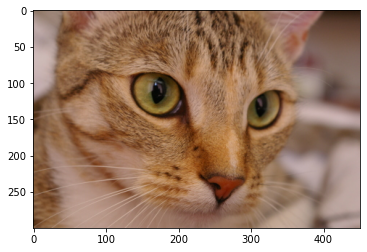

In [3]:
#color images
cat1 = data.chelsea()
plt.imshow(cat1)
plt.show()


a) convolve 함수를 cropping 방법을 이용하여 output image의 intensity를 image 표현값 안으로 유지할 수 있도록 convolve 함수를 재작성 하세요.

In [4]:
def convolve(image, kernel, scale = 1):
    (iH,iW) = image.shape[:2]
    (kH,kW) = kernel.shape[:2]
    
    pad = (kW-1)//2
    output = np.zeros((iH-2*pad, iW-2*pad), dtype = "float32")
    
    for x in np.arange(pad, iH-pad):
        for y in np.arange(pad, iW-pad):
            roi = image[x-pad:x+pad+1, y-pad:y+pad+1]
            output[x-pad,y-pad] = (roi*kernel).sum()*scale
    
    output = rescale_intensity(output, in_range=(0,255))
    output = (output*255).astype("uint8")
    
    #return the output image
    return output

 b) 3x3 Gaussian filter 와 7x7 Gaussian filter를 사용하여 cat 이미지를 smoothing 하여 그림을 출력하고, 그 차이점을 설명하세요.

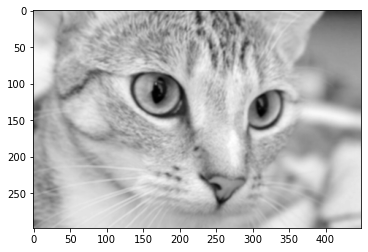

In [12]:
gaussian_3 = np.array((
      [1,1,1],
      [1,1,1],
      [1,1,1]), dtype = "int")

filtered = convolve(cat1[:,:,0], gaussian_3, scale = 1/9)
plt.imshow(filtered, cmap = plt.cm.gray)
plt.show()

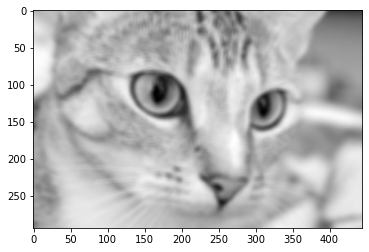

In [14]:
gaussian_7 = np.array((
      [1,1,1,1,1,1,1],
      [1,1,1,1,1,1,1],
      [1,1,1,1,1,1,1],
      [1,1,1,1,1,1,1],
      [1,1,1,1,1,1,1],
      [1,1,1,1,1,1,1],
      [1,1,1,1,1,1,1]), dtype = "int")

filtered = convolve(cat1[:,:,0], gaussian_7, scale = 1/49)
plt.imshow(filtered, cmap = plt.cm.gray)
plt.show()

3x3 보다 7x7을 convolve한 이미지가 뭉게져서 smoothing된것을 볼 수 있다.

 c) 3x3 Laplacian filter를 사용하여 cat 이미지의 윤곽선을 추출하고 그림을 출력하세요. 또한, b)에서 smoothing 된 이미지를 이용하여 윤곽선을 추출하고 그림을 출력하세요. 두 가지 경우의 차이점을 설명하세요.

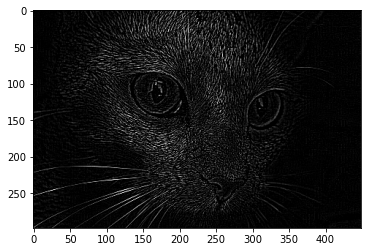

In [16]:
laplacian_3 = np.array((
              [-1,-1,-1],
              [-1,8,-1],
              [-1,-1,-1]), dtype = "int")

filtered = convolve(cat1[:,:,0], laplacian_3)
plt.imshow(filtered,cmap = plt.cm.gray)
plt.show()

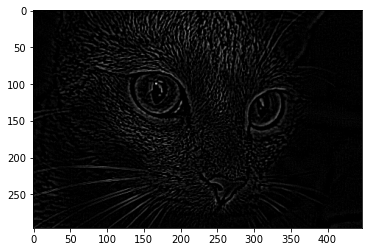

In [17]:
gaussian_3 = np.array((
      [1,1,1],
      [1,1,1],
      [1,1,1]), dtype = "int")

filtered = convolve(cat1[:,:,0], gaussian_3, scale = 1/9)
filtered = convolve(filtered, laplacian_3)
plt.imshow(filtered, cmap = plt.cm.gray)
plt.show()

gaussian convolve를 통해 노이즈를 제거한 smoothing 영상으로 laplacian convolve를 하여 edge detection을 해서 첫번째 이미지 보다 두번째 이미지가 더 선명하게 보인다.